In [1]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from vis_common import load_store, load_games

f = load_games()
print "Loaded data frame with {} records and {} columns".format(
    len(f), len(f.columns))

FS = (10, 6) # Reasonable default figsize

Loaded data frame with 1327938 records and 24 columns


In [7]:
zealot_bgs = {'berserker', 'abyssal knight', 'chaos knight'}
izealot = f['bg'].isin(zealot_bgs)
# Gods come and go like seasons
inow = f['version'] == 0.19

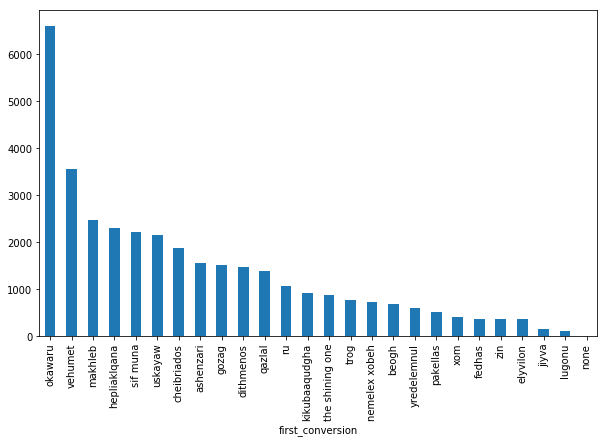

In [18]:
convs_per_god = f[~izealot & inow].groupby('first_conversion').size()\
    .sort_values(ascending=0)
convs_per_god.plot.bar(figsize=FS);

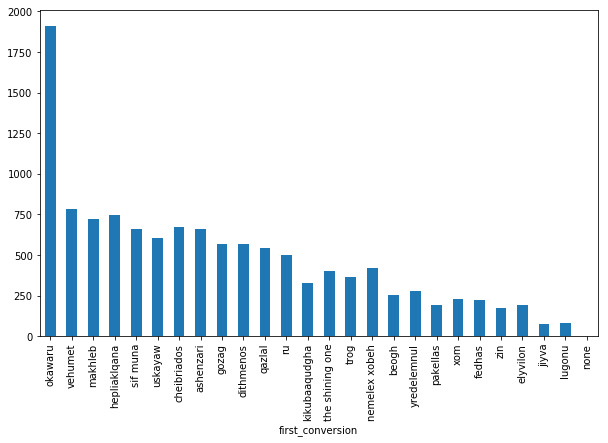

In [20]:
# Opportunistic worship. Before the temple (which spawns from 4-7)
f[~izealot & inow & (f['whereconverted'] < 'd:4')].groupby('first_conversion').size()\
    .loc[convs_per_god.index].plot.bar(figsize=FS);
# Considerably flatter than all conversions

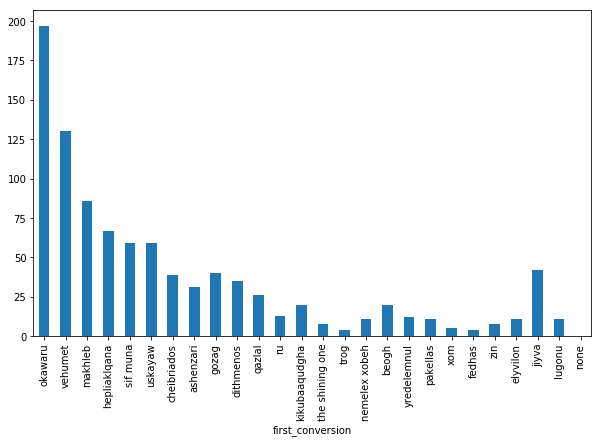

In [21]:
# Dedicated worship. After the temple.
f[~izealot & inow & (f['whereconverted'] > 'd:7') & (f['whereconverted'] != 'temple')]\
    .groupby('first_conversion').size()\
    .loc[convs_per_god.index].plot.bar(figsize=FS);

In [22]:
f['religious_experiences'].value_counts()

0     1002005
1      318132
2        6864
3         657
4         173
5          57
6          16
10         12
9           5
11          4
8           4
7           3
19          2
12          2
20          1
13          1
Name: religious_experiences, dtype: int64

In [30]:
iswitched = (f['religious_experiences'] > 1) | (izealot & (f['religious_experiences'] > 0))
print "{} games involved switching gods ({:.1f}%)".format(
    iswitched.sum(), 100*iswitched.sum()/len(f)
)

10443 games involved switching gods (0.8%)


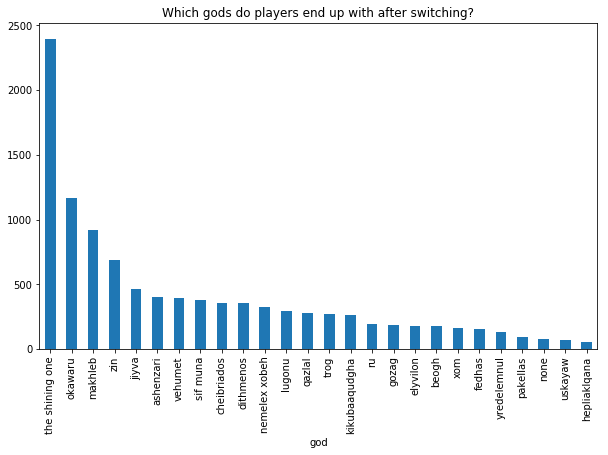

In [28]:
f[iswitched].groupby('god').size().sort_values(ascending=0)\
    .plot.bar(figsize=FS, title="Which gods do players end up with after switching?");

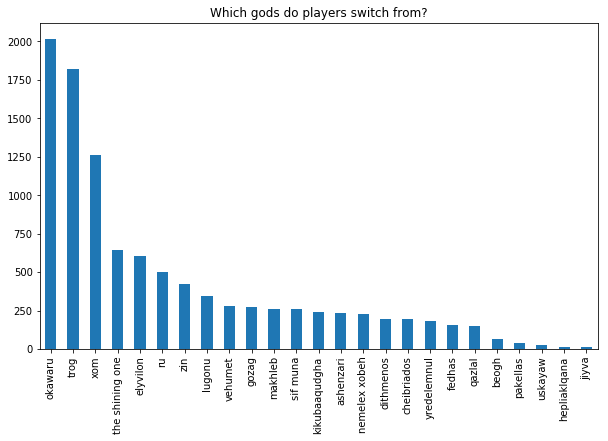

In [34]:
zealot_to_god = {'abyssal knight': 'lugonu', 'chaos knight': 'xom', 'berserker': 'trog'}
def first_god(label):
    return zealot_to_god.get(
        f.loc[label, 'bg'],
        f.loc[label, 'first_conversion']
    )
    
f[iswitched].groupby(first_god).size().sort_values(ascending=0)\
    .plot.bar(figsize=FS, title="Which gods do players switch from?");

In [37]:
 f[iswitched].groupby([first_god, 'god']).size().sort_values(ascending=0).head(10)

                 god            
okawaru          the shining one    1056
trog             the shining one     448
xom              okawaru             256
trog             makhleb             254
                 okawaru             238
elyvilon         the shining one     211
okawaru          makhleb             199
zin              the shining one     199
okawaru          zin                 181
the shining one  okawaru             129
dtype: int64

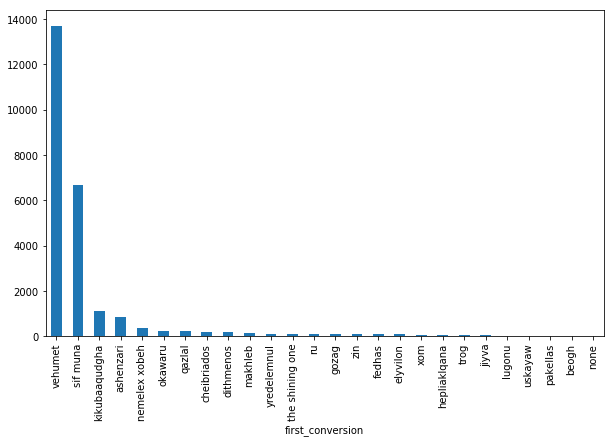

In [38]:
f[(f['species']=='deep elf')].groupby('first_conversion').size().sort_values(ascending=0)\
    .plot.bar(figsize=FS);

In [2]:
f.columns

Index([u'bg', u'bot', u'first_conversion', u'god', u'gold_collected',
       u'gold_spent', u'howdied', u'hunger', u'level', u'nrunes', u'pid',
       u'religious_experiences', u'score', u'species', u'temple_depth',
       u'temple_xl', u'time', u'turns', u'version', u'whereconverted',
       u'wheredied', u'won', u'orig_species', u'legit'],
      dtype='object')